# Predicting On-time Delivery of Online Purchases
## Part III-B: Modeling - Naive Bayes Classifier
## AAI-510 Team 7 Final Project

Team 7:  Ken Devoe, Tyler Foreman, Geoffrey Fadera

University of San Diego, Applied Artificial Intelligence

Date:  June 24, 2024

GitHub Repository: https://github.com/kdevoe/aai510-group7

## Import Common Functions

In [74]:
%run shipping_common_functions.ipynb

## Imports

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

## Load Preprocessed Data

In [5]:
# train data
X_train = pd.read_csv('./data/x_train.csv')
y_train = np.ravel(pd.read_csv('./data/y_train.csv'))

# val data
X_val = pd.read_csv('./data/x_val.csv')
y_val = np.ravel(pd.read_csv('./data/y_val.csv'))

In [6]:
# Check imported data
print('TRAIN SET:')
print('   X_train:', X_train.shape)
print('   y_train:', y_train.shape)
print('\nVALIDATION SET:')
print('   X_val:', X_val.shape)
print('   y_val:', y_val.shape)

TRAIN SET:
   X_train: (8799, 17)
   y_train: (8799,)

VALIDATION SET:
   X_val: (1100, 17)
   y_val: (1100,)


In [5]:
X_train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,-0.925605,5,-0.670120,-0.378680,1,-0.392911,0.311901,0,0,0,0,1,0,0,1,1,0
1,1.697108,3,-0.173246,0.273631,2,-0.638968,0.532606,1,0,0,0,0,0,0,1,1,0
2,-1.799843,5,1.379486,-0.378680,2,-0.454426,-1.585178,0,0,0,1,0,0,0,1,0,1
3,0.822870,5,0.178707,-1.030992,2,-0.577454,0.406052,0,0,1,0,0,0,0,1,0,1
4,1.697108,3,1.772845,0.273631,1,-0.577454,-1.207352,0,0,1,0,0,1,0,0,1,0


In [6]:
X_val.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,-0.051367,2,1.213861,-1.030992,2,-0.700483,0.237314,0,0,0,1,0,0,1,0,1,0
1,-0.051367,2,-0.421683,-0.378680,2,-0.392911,0.697675,1,0,0,0,0,0,1,0,0,1
2,-0.051367,1,-0.297464,-1.030992,1,-0.638968,0.689116,0,0,0,1,0,0,0,1,0,1
3,-0.925605,3,-0.152543,-0.378680,2,-0.392911,0.826674,0,0,0,1,0,1,0,0,0,1
4,0.822870,5,0.779096,0.925943,2,-0.331397,-1.066126,1,0,0,0,0,1,0,0,0,1


## Model 1: Decision Tree Classifier

Decision Tree classifier to predict on-time shipments.

### Model 1: Create, Train Model

Start with some standard hyperparameters to initialize the model as a baseline

In [19]:
# Decision Tree helper functions
def plot_feature_importance(dt, columns):
    feat_importance = dt.tree_.compute_feature_importances(normalize=False)
    #feat_importance_df = pd.DataFrame(feat_importance.reshape(1,-1), columns=list(X_train))
    feat_importance_df = pd.Series(feat_importance, index=columns)

    # plot feature importances
    fig, ax = plt.subplots(figsize=(18, 6))
    feat_importance_df.plot.bar(ax=ax)
    ax.set_title("Feature importances")
    ax.set_ylabel("Importance")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

In [7]:
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, criterion='entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

### Model 1: Describe/Visualize Model

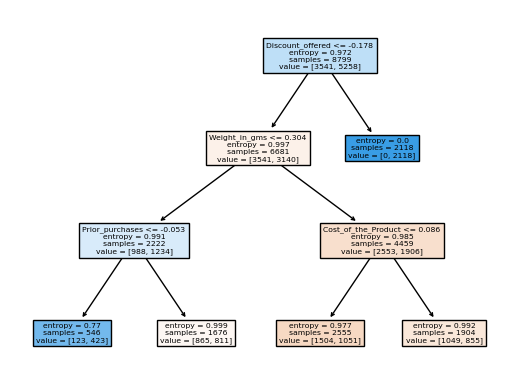

In [8]:
# visualize the tree generated
f_names=list(X_train.columns) 
tree.plot_tree(dt_model, filled=True, feature_names=f_names) 
plt.show() 

### Model 1: Performance on Validation Set

In [9]:
# predict y values based on the validation set
y_pred1 = dt_model.predict(X_val)

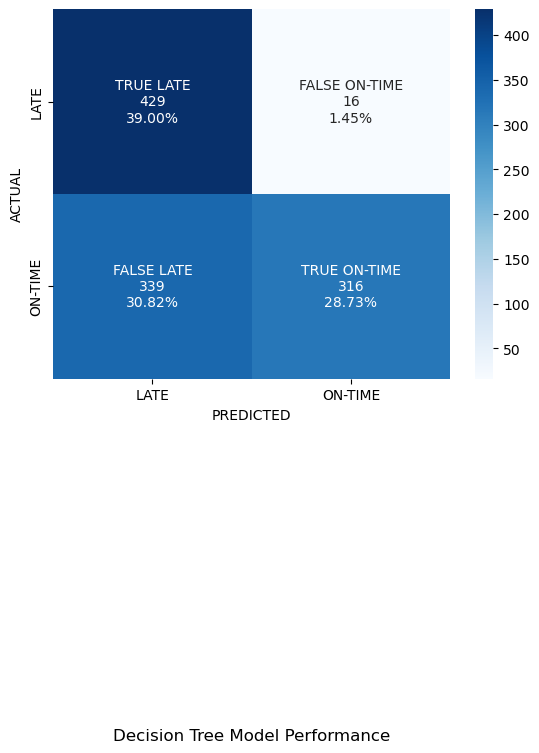

In [10]:
# generate confusion matrix for model1
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred1, title = 'Decision Tree Model Performance')

In [11]:
# Generate Classification Report for model 1
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred1, title = 'Decision Tree')
    

              precision    recall  f1-score   support

        LATE       0.56      0.96      0.71       445
     ON-TIME       0.95      0.48      0.64       655

    accuracy                           0.68      1100
   macro avg       0.76      0.72      0.67      1100
weighted avg       0.79      0.68      0.67      1100



### Model 1: Evaluate Feature Importance

Extract and visualize feature importance for the tree.  Determine if there are any insights to extract that may help optimize the dataset or model.

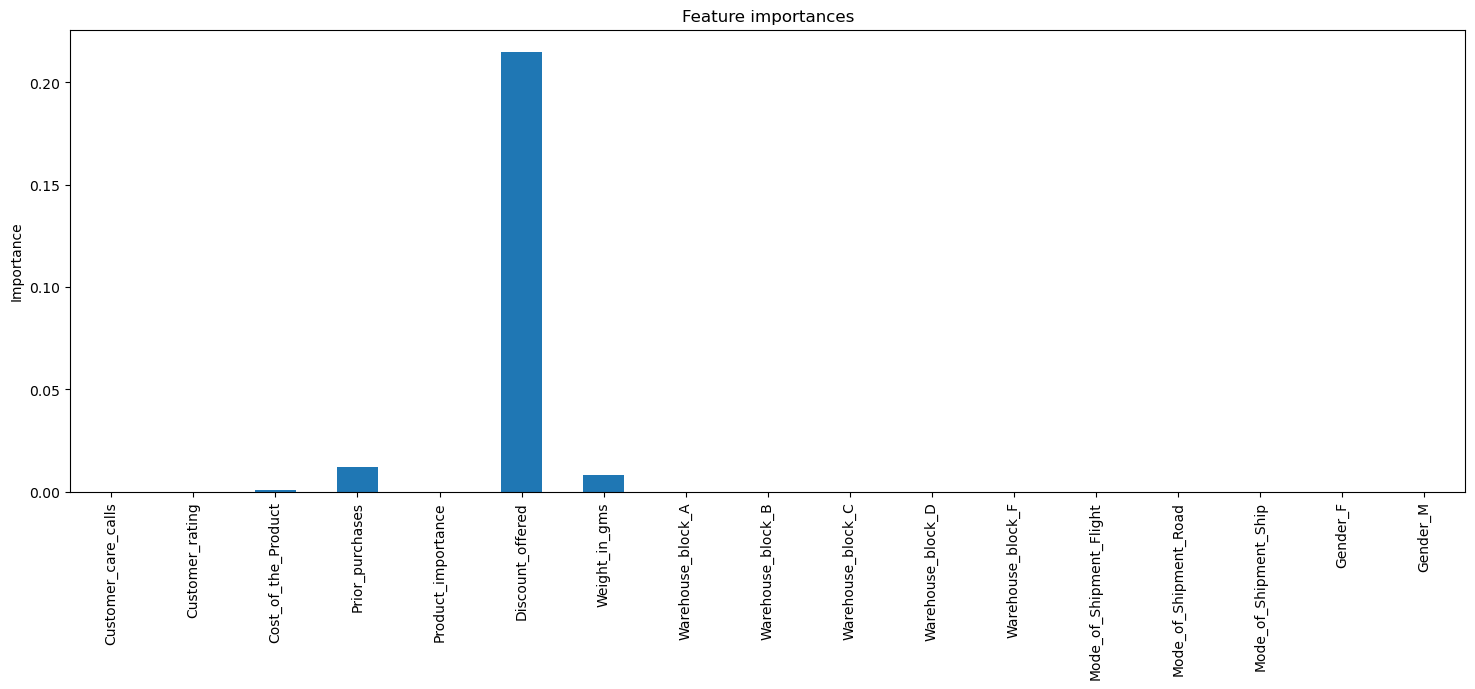

In [20]:
# plot feature importances 
plot_feature_importance(dt_model, X_train.columns)

### Model 1: Hyperparameter Tuning

Perform random search to optimize hyperparameters

In [52]:
# initialize new model
dt_model_tune= DecisionTreeClassifier(random_state=42)

In [53]:
# setup search grid
param_grid = { 
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [2, 3, 4, 5, 7],
    'criterion' :['gini', 'entropy', 'log_loss']
}

In [54]:
# run search
CV_dtc = GridSearchCV(estimator=dt_model_tune, param_grid=param_grid, cv=5, verbose=2)
CV_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.1s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=3; total time=   0.1s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_s

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [2, 3, 4, 5, 7]},
             verbose=2)

In [55]:
# display best found hyperparamater combination
CV_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2}

In [56]:
# get best model
dt_model_best = CV_dtc.best_estimator_

In [57]:
# predict y values based on the validation set using best model
y_pred1_tuned = dt_model_best.predict(X_val)

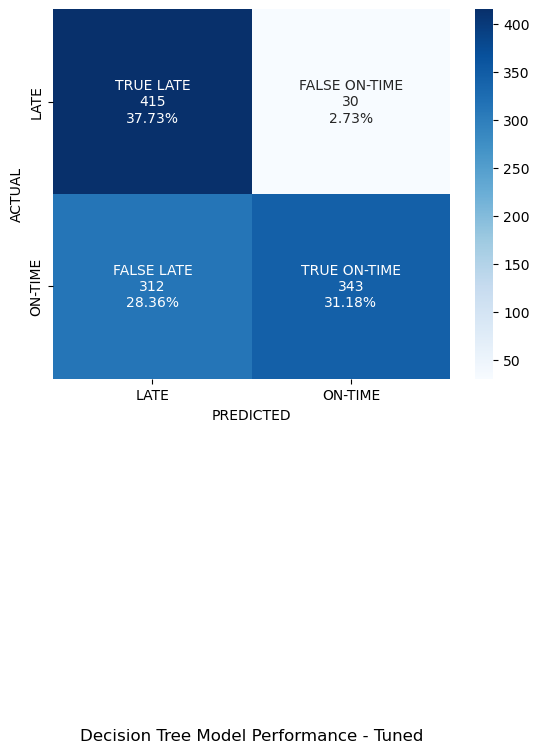

In [58]:
# generate confusion matrix for model1
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred1_tuned, title = 'Decision Tree Model Performance - Tuned')

In [59]:
# Generate Classification Report for model 1 Tuned
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred1_tuned, title = 'Decision Tree - Tuned Hyperparameters')

              precision    recall  f1-score   support

        LATE       0.57      0.93      0.71       445
     ON-TIME       0.92      0.52      0.67       655

    accuracy                           0.69      1100
   macro avg       0.75      0.73      0.69      1100
weighted avg       0.78      0.69      0.68      1100



## Model 2: XGBoost

....

### Model 2: Create, train, evaluate

In [62]:
# fit the baseline model
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

### Model 2: Performance on Validation Set

In [63]:
# predict y values based on the validation set
y_pred2 = xgb1.predict(X_val)

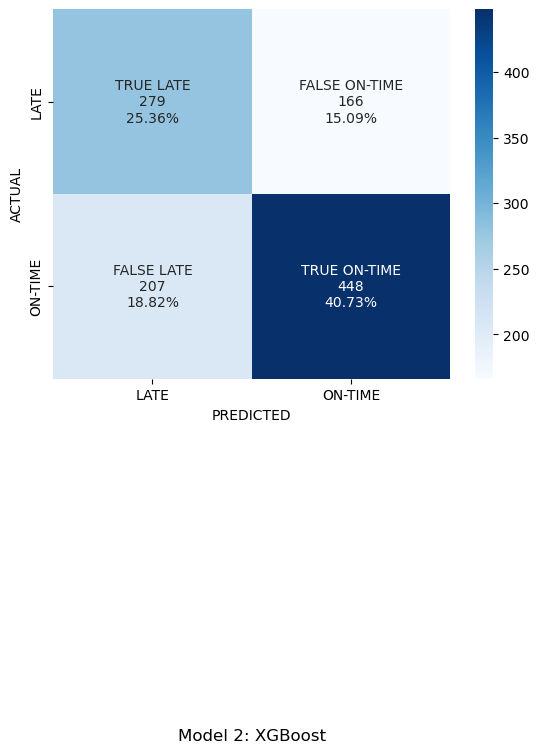

In [64]:
# generate confusion matrix for model2
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred2, title = 'Model 2: XGBoost')

In [65]:
# Generate Classification Report for model 2
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred2, title = 'Model 2: XGBoost Classifier')

              precision    recall  f1-score   support

        LATE       0.57      0.63      0.60       445
     ON-TIME       0.73      0.68      0.71       655

    accuracy                           0.66      1100
   macro avg       0.65      0.66      0.65      1100
weighted avg       0.67      0.66      0.66      1100



### Hyperparameter Tuning XGBoost

In [66]:
# fit the baseline model
xgb1_tuned = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [67]:
# setup search grid
param_grid_xg = { 
    'max_depth':[4,5,6],
    'min_child_weight':[4,5,6,8,10,12],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}

In [68]:
# run search
CV_xgc = GridSearchCV(estimator=xgb1_tuned, param_grid=param_grid_xg, cv=5, verbose=2)
CV_xgc.fit(X_train, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV] END colsample_bytree=0.6, gamma=0.0, max_depth=4, min_child_weight=4, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.6, gamma=0.0, max_depth=4, min_child_weight=4, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=0.0, max_depth=4, min_child_weight=4, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, gamma=0.0, max_depth=4, min_child_weight=4, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=0.0, max_depth=4, min_child_weight=4, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, gamma=0.0, max_depth=4, min_child_weight=4, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.6, gamma=0.0, max_depth=4, min_child_weight=4, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.6, gamma=0.0, max_depth=4, min_child_weight=4, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=0.0, max_depth=4, min_chil

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=1000,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [4, 5, 6],
                         'min_child_weight': [4, 5, 6, 8, 10, 12],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             verbose=2)

In [69]:
# display best found hyperparamater combination
CV_xgc.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 4,
 'min_child_weight': 12,
 'subsample': 0.8}

In [70]:
# get best model
xgc_model_best = CV_xgc.best_estimator_

In [71]:
# predict y values based on the validation set using best model
y_pred2_tuned = xgc_model_best.predict(X_val)

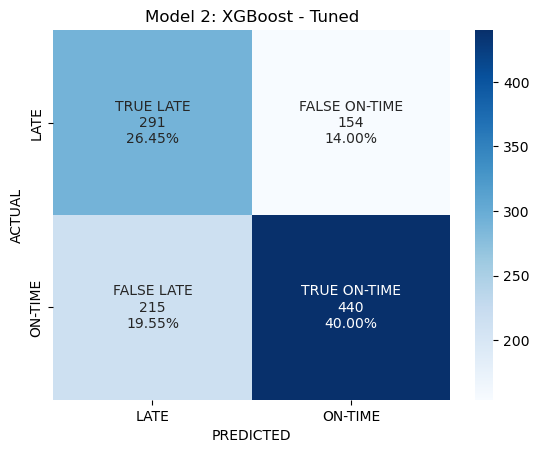

In [75]:
# generate confusion matrix for model2
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred2_tuned, title = 'Model 2: XGBoost - Tuned')

In [73]:
# Generate Classification Report for Tuned XGBoost
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred2_tuned, title = 'Model 2: XGBoost Classifier - Tuned')

              precision    recall  f1-score   support

        LATE       0.58      0.65      0.61       445
     ON-TIME       0.74      0.67      0.70       655

    accuracy                           0.66      1100
   macro avg       0.66      0.66      0.66      1100
weighted avg       0.67      0.66      0.67      1100

